<a href="https://colab.research.google.com/github/EeshGupta/Cookin-Quantum/blob/master/Identifying_Subgraphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports
Some Imports First


In [5]:
!pip install imgaug==0.2.5
!pip install sympy==1.3
!pip install folium==0.2.1
!pip install networkx==2.3
!pip install pynauty

ERROR: Operation cancelled by user


## More Imports

In [6]:
!pip install git+https://github.com/danlkv/qtensor.git@merged_ix

  Cloning https://github.com/danlkv/qtensor.git (to revision merged_ix) to /tmp/pip-req-build-iuylwi4_
  Running command git clone -q https://github.com/danlkv/qtensor.git /tmp/pip-req-build-iuylwi4_
  Running command git checkout -b merged_ix --track origin/merged_ix
  Switched to a new branch 'merged_ix'
  Branch 'merged_ix' set up to track remote branch 'merged_ix' from 'origin'.
  Running command git submodule update --init --recursive -q
  Created wheel for qtensor: filename=qtensor-0.1.2-py2.py3-none-any.whl size=649926 sha256=0ef6a8c6b85a42bce3e805708c3ff9291859580345b1ae57460936fe0ed41e7e
  Stored in directory: /tmp/pip-ephem-wheel-cache-z2_5zzty/wheels/4f/4b/c1/10720e16e3294fff7026430b27ba65f202e217f28e993a5f50
Successfully built qtensor


In [7]:
import warnings
warnings.filterwarnings('ignore')

import time
import os
import numpy as np
import scipy.optimize
from scipy.optimize import minimize
from argparse import ArgumentParser, ArgumentDefaultsHelpFormatter
import random
import matplotlib.pyplot as plt
import scipy.stats as ss
import math
import copy
import networkx
import networkx as nx
from datetime import datetime
import csv 
import numpy as np
import seaborn as sns
from scipy.optimize import curve_fit
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.ticker import ScalarFormatter
%matplotlib inline
import ast
import re
from networkx.linalg.spectrum import laplacian_spectrum
from itertools import product

!pip install nlopt
#!pip install quimb
#!pip install autoray
#!pip install pytorch
#!pip install cotengra
!pip install quimb autoray git+https://github.com/jcmgray/cotengra
!pip install cartesian_explorer
import nlopt

from qtensor import parameter_optimization as popt
import torch


  Cloning https://github.com/jcmgray/cotengra to /tmp/pip-req-build-3f320wyp
  Running command git clone -q https://github.com/jcmgray/cotengra /tmp/pip-req-build-3f320wyp
  Created wheel for cotengra: filename=cotengra-0.1.0-cp37-none-any.whl size=93862 sha256=5a4459d486c12ebaf1b7bd75ae365b9446cf97769496d79f5059ef38dfc48057
  Stored in directory: /tmp/pip-ephem-wheel-cache-t4d63kdj/wheels/52/e9/04/0a344372762d0fd3344e788ce2d14f816bddd673d022a5f915
Successfully built cotengra


# Identifying Subgraphs

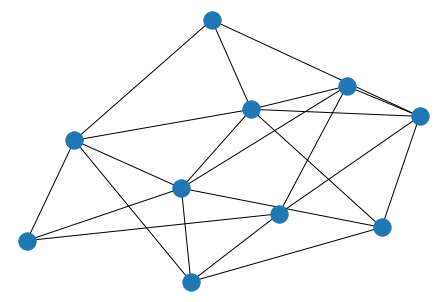

In [11]:
G = nx.generators.fast_gnp_random_graph(10, 0.5)
nx.draw(G)

In [14]:
G.edges()

EdgeView([(0, 1), (0, 4), (0, 5), (0, 9), (1, 2), (1, 5), (1, 7), (2, 4), (2, 6), (2, 7), (2, 8), (3, 4), (3, 5), (3, 9), (4, 8), (5, 7), (5, 8), (5, 9), (6, 7), (6, 9), (7, 8), (7, 9)])

In [17]:
dicty = nx.all_neighbors(G, 0)
for v in dicty:
  print(v)

1
4
5
9


In [18]:
v1 = 0
v2 = 1

dicty1 = nx.all_neighbors(G, 0)
dicty2 = nx.all_neighbors(G, 1)

In [19]:
subg_edge_set = []
for v in dicty1:
  edge = (v1, v)
  if edge not in subg_edge_set:
    subg_edge_set.append(edge)

for v in dicty2:
  edge = (v2, v)
  if edge not in subg_edge_set:
    subg_edge_set.append(edge)

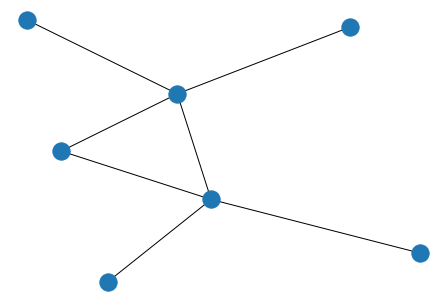

In [21]:
H = G.edge_subgraph(subg_edge_set)
nx.draw(H)

In [22]:
G.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9))

In [ ]:
def find_subgraphs(G):
  '''
  Input: A graph G
  Output: A dictionary containg subgraphs and their frequency in G
  '''
  edges_done = []
  subgraphs = {}

  vertices = G.nodes
  for v1 in vertices:
    neighbors = nx.all_neighbors(G,v1)
    #iterate over edges
    for v2 in neighbors:

      ##if already there
      if (v1,v2) in edges_done:
        continue
      ##add if not there
      else:
        edges_done.append((v1,v2))
        edges_done.append((v2,v1))
      
      neighbors1 = neighbors
      neighbors2 = nx.all_neighbors(G, v2)

      subg_edge_set = []
      for v in neighbors1:
        edge = (v1, v)
        if edge not in subg_edge_set:
          subg_edge_set.append(edge)

      for v in neighbors2:
        edge = (v2, v)
        if edge not in subg_edge_set:
          subg_edge_set.append(edge)

      ##check if isomorphic
